# <span style="color:#8B0000;">Predicción de la Calidad del Vino con Machine Learning</span>

## <span style="color:#8B0000;">Introducción</span>

En este notebook, se comparan diferentes modelos de Machine Learning para predecir la calidad del vino a partir de las características químicas proporcionadas en un conjunto de datos.

### <span style="color:#8B0000;">Modelos Utilizados</span>

1. **Random Forest**
2. **XGBoost**
3. **SVM (Máquinas de Vectores de Soporte)**

El objetivo de este análisis es determinar cuál de estos modelos tiene el mejor rendimiento al predecir la calidad del vino. Las métricas de evaluación utilizadas son:

- **MSE (Error Cuadrático Medio)**: Mide el promedio de los errores al cuadrado. Cuanto menor es el MSE, mejor es el modelo.
- **R² (Coeficiente de Determinación)**: Indica cuán bien el modelo explica la variabilidad de los datos. Un valor cercano a 1 indica un buen ajuste del modelo.

A través de este análisis, se buscará identificar el modelo más eficiente para predecir la calidad del vino de manera precisa y confiable.





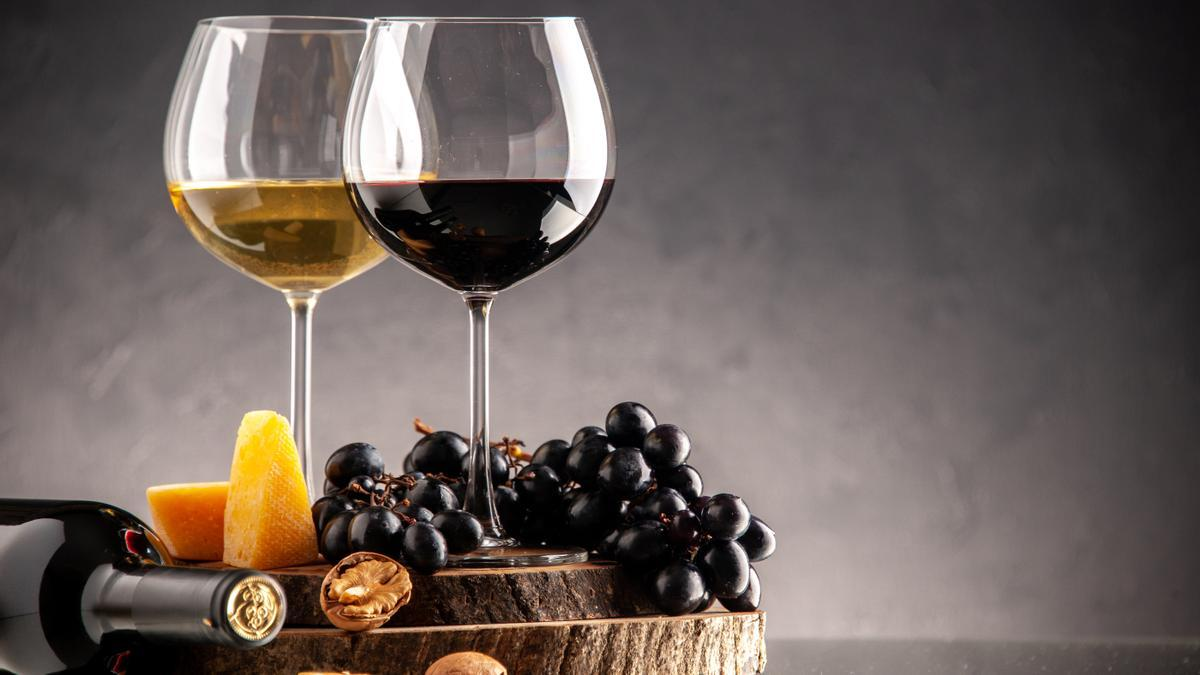

In [47]:
from IPython.display import Image
Image(filename='C:/Users/angel/OneDrive/Documentos/DATA_SCIENCE/Bootcamp/ML_WineQuality/src/img/wine.jpg')

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [49]:
file_path = 'C:/Users/angel/OneDrive/Documentos/DATA_SCIENCE/Bootcamp/ML_WineQuality/data/winequality-red.csv'
df = pd.read_csv(file_path, sep=';')

print("Primeras filas del dataset:")
print(df.head())
print("\nNombres de las columnas:")
print(df.columns)

Primeras filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8    

In [50]:
X = df.drop(columns=['quality'])
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.218332,0.889712,0.192092,0.309726,-0.049642,0.691007,1.042934,1.846696,1.093500,0.458223,1.123177
1,-1.290166,-1.788783,0.652753,-0.805080,-0.455214,2.388473,3.593870,-3.004491,-0.400439,-0.401197,1.408272
2,1.494753,-0.784347,1.011045,-0.526378,0.599272,-0.957960,-0.991742,0.768655,-0.075669,0.515517,-0.587390
3,0.276351,0.861811,-0.063831,-0.665729,-0.009085,0.012020,-0.718427,0.089488,0.054238,-1.088733,-0.967516
4,0.044274,2.814880,-0.626861,2.399985,-0.313264,-0.472970,0.222990,1.199871,0.379008,-0.974144,-0.492358


In [51]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [52]:
xgboost_model = xgb.XGBRegressor()
xgboost_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgboost_model.predict(X_test_scaled)

In [53]:
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)


Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.74      0.72       130
           6       0.63      0.70      0.66       132
           7       0.64      0.55      0.59        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320



c:\Users\angel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\angel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\angel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

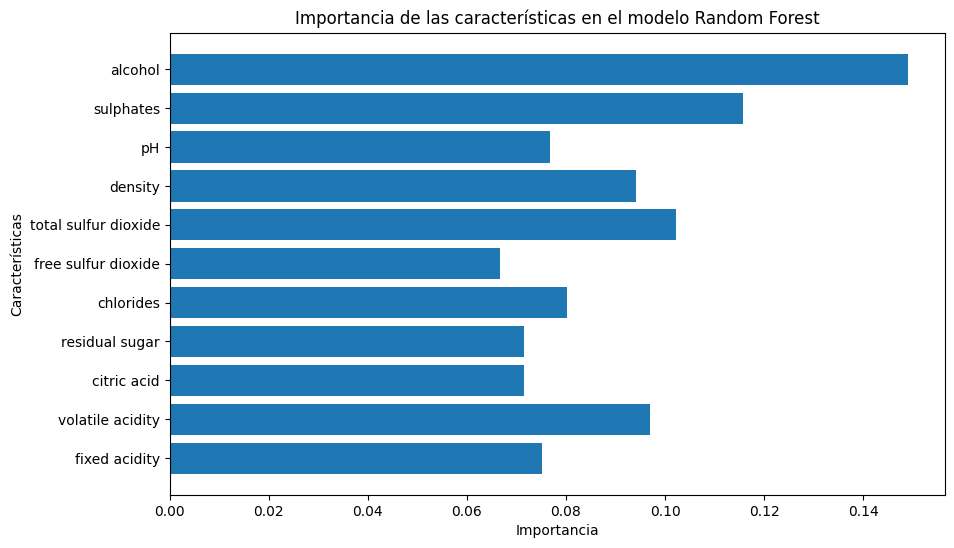

In [54]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características en el modelo Random Forest')
plt.show()

In [60]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")
print(f"XGBoost - MSE: {mse_xgb}, R²: {r2_xgb}")
print(f"SVM - MSE: {mse_svm}, R²: {r2_svm}")

Random Forest - MSE: 0.3134115625000001, R²: 0.5204150689639713
XGBoost - MSE: 0.35126441717147827, R²: 0.4624922275543213
SVM - MSE: 0.3513741345230523, R²: 0.46232443139974366


In [58]:
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

# <span style="color:#8B0000;">Conclusiones</span>

Basándonos en los resultados obtenidos:

- **Random Forest** muestra el mejor rendimiento en términos de R² y MSE comparado con XGBoost y SVM.
- **XGBoost** tiene un buen desempeño pero no supera a Random Forest.
- El modelo **SVM** tiene el peor rendimiento en términos de MSE.

Por lo tanto, **Random Forest** es el modelo más efectivo para predecir la calidad del vino.
